In [1]:
import os, inspect, sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import pandas as pd

data = pd.read_csv('../datasets/jurisprudencias_stj.csv', index_col=0)
data

,jurisprudencia_index,tema,processo,relator,orgao,data_julgamento,data_publicacao,ementa
0,0,1) A falta de defesa técnica por advogado no p...,Processo\nAgRg no AREsp 331607 / SP\nAGRAVO RE...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),Órgão Julgador\nT2 - SEGUNDA TURMA,Data do Julgamento\n15/08/2013,Data da Publicação/Fonte\nDJe 16/09/2013,Ementa\nPROCESSUAL CIVIL. AGRAVO REGIMENTAL. A...
1,0,1) A falta de defesa técnica por advogado no p...,Processo\nRMS 31995 / RS\nRECURSO ORDINÁRIO EM...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),Órgão Julgador\nT1 - PRIMEIRA TURMA,Data do Julgamento\n15/08/2013,Data da Publicação/Fonte\nDJe 26/08/2013,Ementa\nRECURSO ORDINÁRIO EM MANDADO DE SEGURA...
2,0,1) A falta de defesa técnica por advogado no p...,Processo\nRMS 32169 / RN\nRECURSO ORDINÁRIO EM...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),Órgão Julgador\nT2 - SEGUNDA TURMA,Data do Julgamento\n02/05/2013,Data da Publicação/Fonte\nDJe 17/06/2013,Ementa\nPROCESSUAL CIVIL E ADMINISTRATIVO. MAN...
3,0,1) A falta de defesa técnica por advogado no p...,Processo\nAgRg no REsp 1256653 / SP\nAGRAVO RE...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),Órgão Julgador\nT1 - PRIMEIRA TURMA,Data do Julgamento\n28/08/2012,Data da Publicação/Fonte\nDJe 05/09/2012,Ementa\nPROCESSUAL CIVIL E ADMINISTRATIVO. AGR...
4,0,1) A falta de defesa técnica por advogado no p...,Processo\nMS 15313 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n09/11/2011,Data da Publicação/Fonte\nDJe 18/11/2011,Ementa\nADMINISTRATIVO. MANDADO DE SEGURANÇA. ...
...,...,...,...,...,...,...,...,...
1049,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 15271 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro GURGEL DE FARIA (1160),Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n13/05/2020,Data da Publicação/Fonte\nDJe 29/05/2020,Ementa\nADMINISTRATIVO. SERVIDOR PÚBLICO. PROC...
1050,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 17807 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistra REGINA HELENA COSTA (1157),Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n11/12/2019,Data da Publicação/Fonte\nDJe 13/12/2019,Ementa\nDIREITO ADMINISTRATIVO. MANDADO DE SEG...
1051,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 23464 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n11/12/2019,Data da Publicação/Fonte\nDJe 13/12/2019,Ementa\nPROCESSUAL CIVIL. ADMINISTRATIVO. MAND...
1052,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 22617 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro NAPOLEÃO NUNES MAIA FILHO...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n27/11/2019,Data da Publicação/Fonte\nDJe 03/12/2019,Ementa\nMANDADO DE SEGURANÇA. PROCESSO ADMINIS...


In [3]:
v = data[['jurisprudencia_index']]
custom_data = data[v.replace(v.apply(pd.Series.value_counts)).gt(2).all(1)]

In [4]:
import numpy as np

group_count = []
grouped_df = custom_data.groupby('jurisprudencia_index')
for key, item in grouped_df:
    jurisprudencia_group = grouped_df.get_group(key)
    group_count.append(len(jurisprudencia_group))
#     print(jurisprudencia_group, "\n\n")
print(np.median(group_count))
print(np.mean(group_count))

5.0
5.157068062827225


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(custom_data, test_size=0.5, stratify=custom_data.jurisprudencia_index, random_state=42)

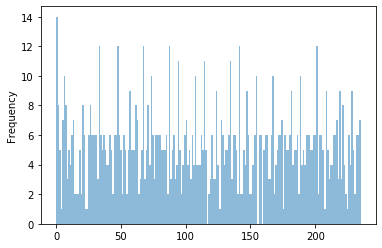

In [6]:
data.jurisprudencia_index.plot.hist(bins=200, alpha=0.5)

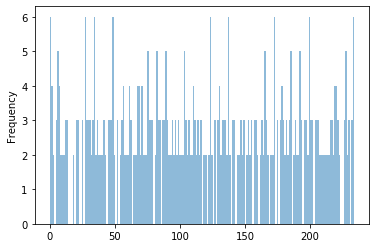

In [7]:
train.jurisprudencia_index.plot.hist(bins=200, alpha=0.5)

In [45]:
from rank_bm25 import BM25Okapi, BM25Plus
import numpy as np

tokenized_corpus = [doc.split(" ") for doc in train.ementa]
bm25 = BM25Plus(tokenized_corpus)

def biggests_index(a,N): 
    return np.argsort(a)[::-1][:N]

In [46]:
for index, doc in train.iterrows():
    doc_scores = bm25.get_scores(doc.ementa.split(' '))
    nns = biggests_index(doc_scores, 5)
#src: https://stats.stackexchange.com/questions/171589/normalised-score-for-bm25
    for nn in nns:
        print(index, nn, doc_scores[nn]/sum(doc_scores[nns]))
#         print(doc.ementa)
#         print("------------------------")
#         print(train.iloc[nn].ementa)
    print('##############################################')

52 0 0.33884327107209256
52 72 0.16773000390215698
52 109 0.1645229314689998
52 209 0.16445868419408521
52 476 0.16444510936266543
##############################################
398 1 0.3398888002276318
398 471 0.18103621353315877
398 370 0.16377892751017922
398 117 0.15837572844509357
398 259 0.15692033028393657
##############################################
585 2 0.34523680629206693
585 211 0.16480561338761843
585 84 0.16362760158060077
585 447 0.16335868145321664
585 239 0.16297129728649726
##############################################
479 3 0.34991176412606384
479 138 0.17189795886787446
479 261 0.16137432060528903
479 145 0.16063045708718346
479 223 0.15618549931358922
##############################################
365 4 0.3071565642248989
365 246 0.18694778142993052
365 307 0.1722447172779194
365 386 0.1706671984539676
365 350 0.1629837386132836
##############################################
323 5 0.318005432122191
323 215 0.1783652296519949
323 156 0.16991827075864593
323 319 0

KeyboardInterrupt: 